In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_excel("../Data/processed/firmarm_data_cleaned.xlsx")
df.head()

,year,state,state_name,rate,deaths,high_risk,rate_change,law_strength_change,restrictive_ratio,permissive_ratio,...,class_permissive_firearm_removal_at_scene_of_domestic_violence,class_permissive_firearms_in_college_university,class_permissive_child_access_laws,class_permissive_gun_trafficking,class_permissive_open_carry,class_permissive_required_reporting_of_lost_or_stolen_firearms,class_permissive_safety_training_required,class_permissive_untraceable_firearms,class_permissive_permit_to_purchase,class_permissive_firearms_in_k_12_educational_settings
0,2014,AK,Alaska,19.2,145,1,NaN,NaN,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
1,2015,AK,Alaska,23.4,177,1,4.2,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
2,2016,AK,Alaska,23.3,177,1,-0.1,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
3,2017,AK,Alaska,24.5,180,1,1.2,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0
4,2018,AK,Alaska,21.0,155,1,-3.5,0.0,0.72,0.28,...,0,0,0,0,0,0,0,0,0,0


# Basic Descriptive Statistics

## Categorical Variables Summary

In [4]:
df[["year", "rate", "deaths", "law_strength_score", "restrictive_laws", "permissive_laws"]].describe()

,year,rate,deaths,law_strength_score,restrictive_laws,permissive_laws
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,2018.515936,14.011753,828.041833,21.737052,28.615538,6.878486
std,2.880651,5.769315,808.573656,13.611467,13.529800,1.868740
min,2014.000000,2.500000,34.000000,6.000000,12.000000,3.000000
25%,2016.000000,10.500000,225.250000,13.000000,20.000000,6.000000
50%,2019.000000,13.600000,614.500000,17.000000,24.000000,7.000000
75%,2021.000000,17.675000,1137.500000,25.000000,32.000000,8.000000
max,2023.000000,33.900000,4630.000000,68.000000,77.000000,12.000000


In [6]:
## Categorical Table Counts
print(df['year'].value_counts())
print(df['state_name'].value_counts())

year
2023    51
2022    51
2015    50
2014    50
2016    50
2017    50
2019    50
2018    50
2021    50
2020    50
Name: count, dtype: int64
state_name
Alaska                  10
Alabama                 10
Arkansas                10
Arizona                 10
California              10
Colorado                10
Connecticut             10
Delaware                10
Florida                 10
Georgia                 10
Hawaii                  10
Indiana                 10
Iowa                    10
Idaho                   10
Illinois                10
Kentucky                10
Kansas                  10
Louisiana               10
Massachusetts           10
Ohio                    10
Maryland                10
Maine                   10
Michigan                10
Minnesota               10
Missouri                10
Mississippi             10
Montana                 10
North Carolina          10
North Dakota            10
Nebraska                10
New Hampshire           10
New Jersey 

<Axes: xlabel='year', ylabel='count'>

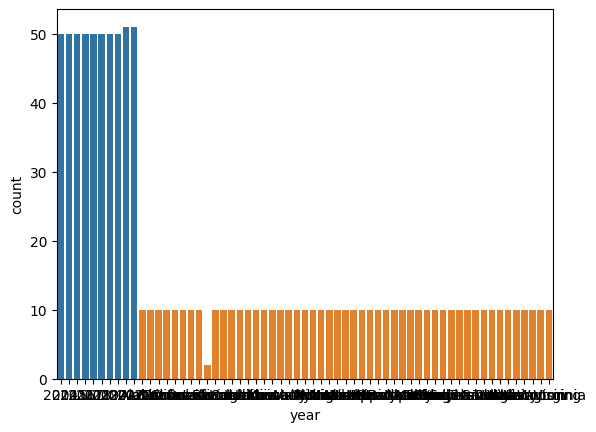

In [7]:
## Categorical Distribution Plots
sns.countplot(x='year', data=df)
sns.countplot(x='state_name', data=df)

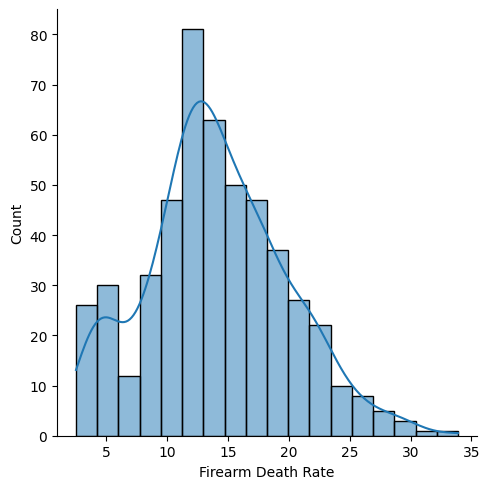

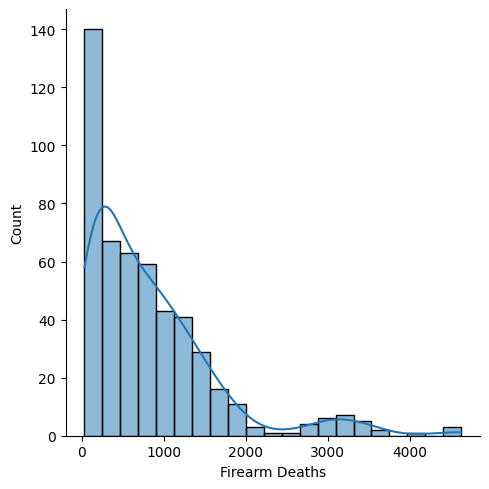

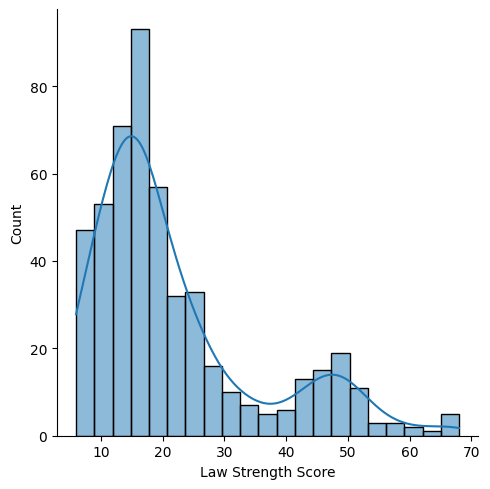

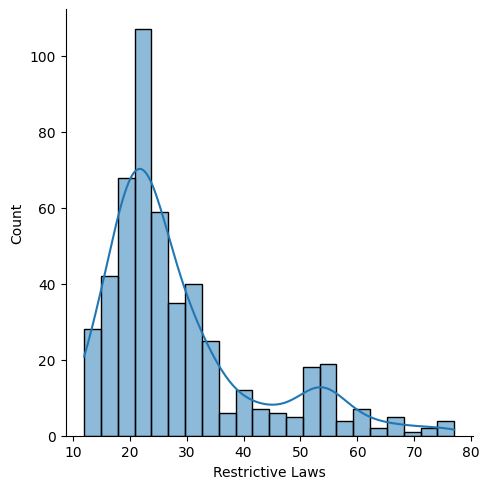

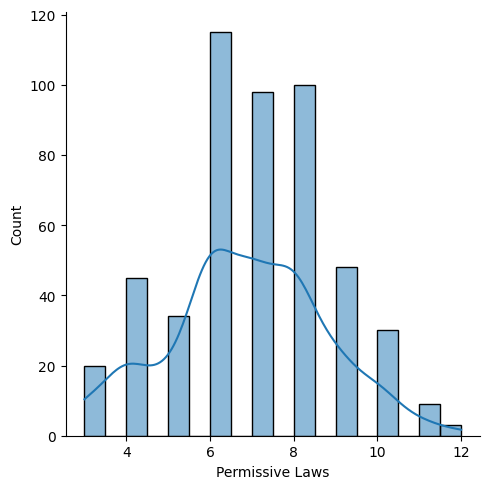

In [17]:
## Numeric Distribution Plots
ax1 = sns.displot(df['rate'], kde=True)
ax1.set(xlabel='Firearm Death Rate')
ax2 = sns.displot(df['deaths'], kde=True)
ax2.set(xlabel='Firearm Deaths')
ax3 = sns.displot(df['law_strength_score'], kde=True)
ax3.set(xlabel='Law Strength Score')
ax4 = sns.displot(df['restrictive_laws'], kde=True)
ax4.set(xlabel='Restrictive Laws')
ax5 =sns.displot(df['permissive_laws'], kde=True)
ax5.set(xlabel='Permissive Laws')
ax1
ax2
ax3
ax4
ax5

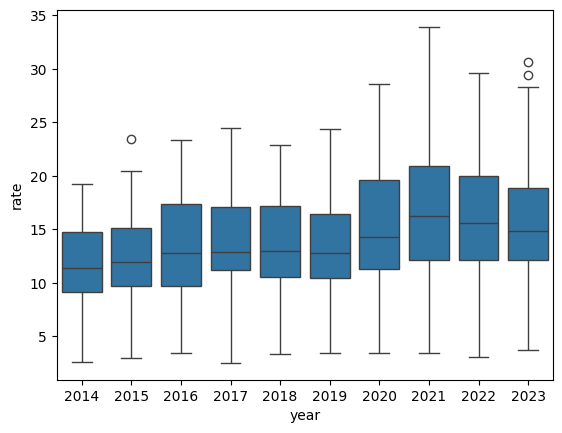

In [9]:
# Boxplot of Year by Rate
sns.boxplot(x='year', y='rate', data=df)
plt.show()

In [10]:
# NA Values
df[['state_name','year', 'deaths', 'rate', 'law_strength_score', 'restrictive_laws', 'permissive_laws']].isna().sum()

state_name            0
year                  0
deaths                0
rate                  0
law_strength_score    0
restrictive_laws      0
permissive_laws       0
dtype: int64

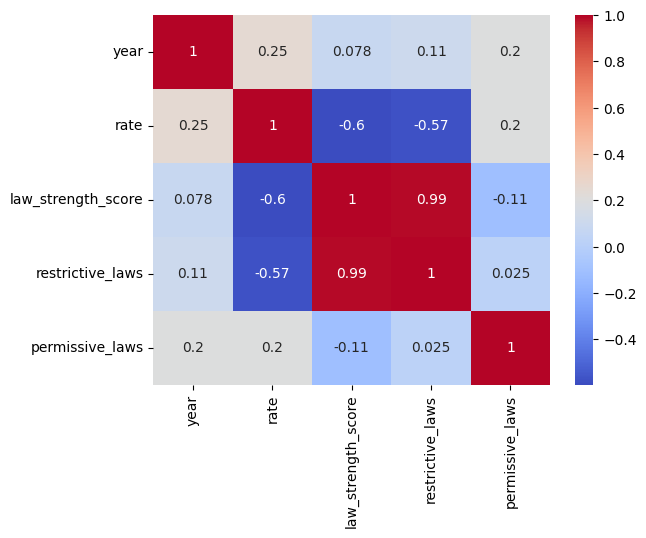

In [11]:
# Correlation Heatmap
correlation_matrix = df[['year', 'rate', 'law_strength_score', 'restrictive_laws', 'permissive_laws']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

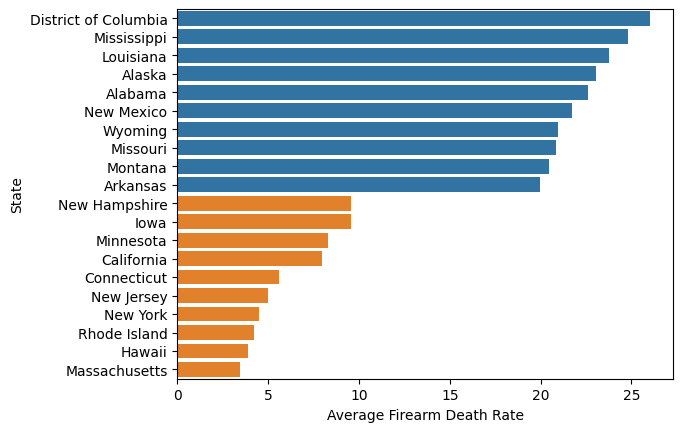

In [12]:
# Average Firearm Death Rate by State and plot
rate_by_state_top = df.groupby('state_name')['rate'].mean().sort_values(ascending=False).head(10)
rate_by_state_bottom = df.groupby('state_name')['rate'].mean().sort_values(ascending=False).tail(10)
ax = sns.barplot(x=rate_by_state_top.values, y=rate_by_state_top.index, orient='h')
ax.set(xlabel='Average Firearm Death Rate', ylabel='State')

ax2 = sns.barplot(x=rate_by_state_bottom.values, y=rate_by_state_bottom.index, orient='h')
ax2.set(xlabel='Average Firearm Death Rate', ylabel='State')
plt.show()


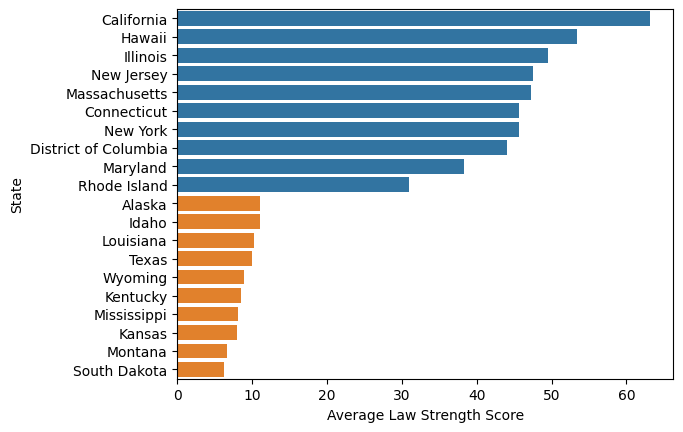

In [13]:
# Average Law Strength Score by State and plot
strength_by_state_top = df.groupby('state_name')['law_strength_score'].mean().sort_values(ascending=False).head(10)
strength_by_state_bottom = df.groupby('state_name')['law_strength_score'].mean().sort_values(ascending=False).tail(10)
ax = sns.barplot(x=strength_by_state_top.values, y=strength_by_state_top.index, orient='h')
ax.set(xlabel='Average Law Strength Score', ylabel='State')

ax2 = sns.barplot(x=strength_by_state_bottom.values, y=strength_by_state_bottom.index, orient='h')
ax2.set(xlabel='Average Law Strength Score', ylabel='State')
plt.show()

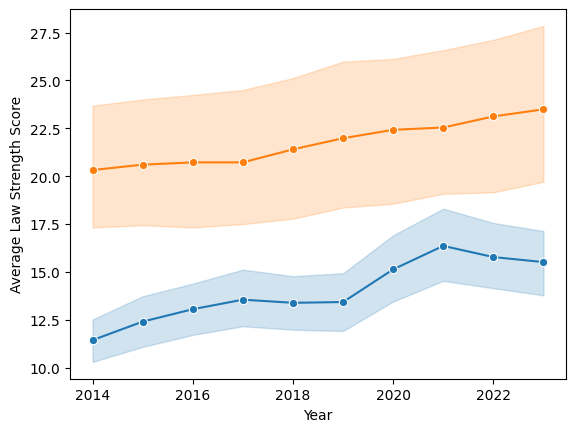

In [15]:
# Average Firearm Death Rate Over Time Line Plot
# Average Law Strength Score Over Time Line Plot
ax = sns.lineplot(x='year', y='rate', data=df, marker='o')
ax.set(xlabel='Year', ylabel='Average Firearm Death Rate')

ax2 = sns.lineplot(x='year', y='law_strength_score', data=df, marker='o')
ax2.set(xlabel='Year', ylabel='Average Law Strength Score')

plt.show()

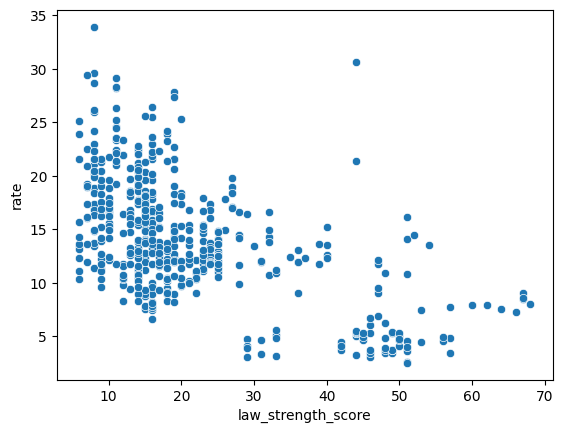

In [16]:
## Gun Law Strength vs Firearm Death Rate
sns.scatterplot(x='law_strength_score', y='rate', data=df, )
plt.show()